In [1]:
from deimkit import list_models, load_model

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [3]:
model = load_model("deim_hgnetv2_s", 
                   checkpoint="/home/dnth/Desktop/deim-wrapper/outputs/deim_hgnetv2_s_coco_cells/last.pth",
                   class_names=["cell", "platelet", "red_blood_cell", "white_blood_cell"])

2025-03-10 12:26:01.998 | INFO     | deimkit.predictor:__init__:41 - Initializing Predictor with device=auto
2025-03-10 12:26:02.015 | INFO     | deimkit.predictor:__init__:60 - Auto-selected device: cuda
2025-03-10 12:26:02.015 | INFO     | deimkit.predictor:__init__:68 - Using custom checkpoint: /home/dnth/Desktop/deim-wrapper/outputs/deim_hgnetv2_s_coco_cells/last.pth
2025-03-10 12:26:02.018 | DEBUG    | deimkit.predictor:__init__:90 - Successfully initialized distributed environment
2025-03-10 12:26:02.018 | INFO     | deimkit.predictor:__init__:101 - Loading configuration from model name: deim_hgnetv2_s
2025-03-10 12:26:02.358 | WARNING  | deimkit.predictor:__init__:122 - Could not load checkpoint with non-strict loading: Error(s) in loading state_dict for DEIM:
	size mismatch for decoder.denoising_class_embed.weight: copying a param with shape torch.Size([5, 256]) from checkpoint, the shape in current model is torch.Size([81, 256]).
	size mismatch for decoder.enc_score_head.weigh

In [4]:
result = model.predict("/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00099_jpg.rf.d60344d65fdf49563ec54664b0e79f70.jpg", 
                       visualize=True)

2025-03-10 12:26:02.556 | DEBUG    | deimkit.predictor:predict:260 - Loading image from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00099_jpg.rf.d60344d65fdf49563ec54664b0e79f70.jpg
2025-03-10 12:26:02.855 | DEBUG    | deimkit.predictor:predict:300 - Prediction complete. Found 14 objects
2025-03-10 12:26:02.856 | DEBUG    | deimkit.predictor:predict:303 - Generating visualization


In [5]:
result

{'boxes': array([[218.0812   , 227.61555  , 375.48468  , 344.70233  ],
        [430.81848  ,  15.973042 , 537.2592   , 116.53423  ],
        [503.8655   , 123.857864 , 616.62854  , 236.84659  ],
        [541.269    , 366.23022  , 637.9864   , 462.80713  ],
        [384.80005  ,  63.94007  , 421.05615  , 101.83097  ],
        [142.89659  , 156.14413  , 257.5296   , 247.3286   ],
        [ 30.616951 ,   0.7115364, 135.63861  ,  79.92488  ],
        [376.2539   , 187.81609  , 478.0822   , 288.68622  ],
        [378.58417  , 405.64105  , 497.23203  , 480.1494   ],
        [535.24097  ,   1.3091326, 634.709    ,  78.98683  ],
        [334.86374  , 151.55922  , 368.51944  , 185.98376  ],
        [ 48.125706 , 318.69873  , 139.7235   , 418.0679   ],
        [124.8475   , 215.9502   , 221.9631   , 325.0449   ],
        [  1.0892963, 226.82703  ,  50.524323 , 334.20752  ]],
       dtype=float32),
 'labels': array([3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2]),
 'scores': array([0.82812816, 0.77346

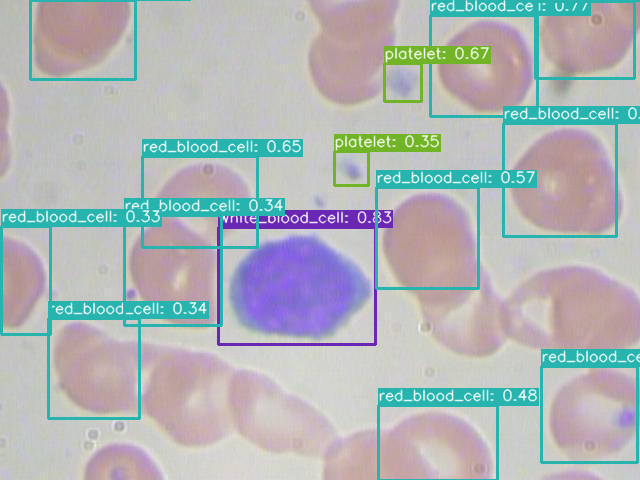

In [6]:
result["visualization"]

In [7]:
# Load folder of images
import glob
image_paths = glob.glob('/home/dnth/Desktop/DEIM/dataset/images/test/*.jpg')

image_paths



['/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00062_jpg.rf.d5f527bc75eb023b530cc25a76268d64.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00254_jpg.rf.6766c79666f2bde5d4b5bbd988714a9e.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00044_jpg.rf.76fca35f8f8f8310472b33f2fce3013a.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00134_jpg.rf.dc3431fd875fa36eafd1e72c6218d691.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00090_jpg.rf.2e7c0319b7e86fb52acc2e425148eb58.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00302_jpg.rf.73c92ceaf01fd6a97da8c9653ee4b0e2.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00120_jpg.rf.148c37b4a13a538157509f006b83b843.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00266_jpg.rf.7ecb7f28fd7c45a4f129443425e1dd9b.jpg',
 '/home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00369_jpg.rf.86fbe6c7bdf7777bfb56e3960016c15d.jpg',
 '/home/dnth/Deskto

In [8]:
results = model.predict_batch(image_paths[0:6], conf_threshold=0.2, visualize=True)

2025-03-10 12:26:02.908 | INFO     | deimkit.predictor:predict_batch:338 - Processing batch of 6 images with batch_size=16
2025-03-10 12:26:02.909 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 0 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00062_jpg.rf.d5f527bc75eb023b530cc25a76268d64.jpg
2025-03-10 12:26:02.915 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 1 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00254_jpg.rf.6766c79666f2bde5d4b5bbd988714a9e.jpg
2025-03-10 12:26:02.923 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 2 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00044_jpg.rf.76fca35f8f8f8310472b33f2fce3013a.jpg
2025-03-10 12:26:02.930 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 3 from path: /home/dnth/Desktop/DEIM/dataset/images/test/BloodImage_00134_jpg.rf.dc3431fd875fa36eafd1e72c6218d691.jpg
2025-03-10 12:26:02.937 | DEBUG    | deimkit.pred

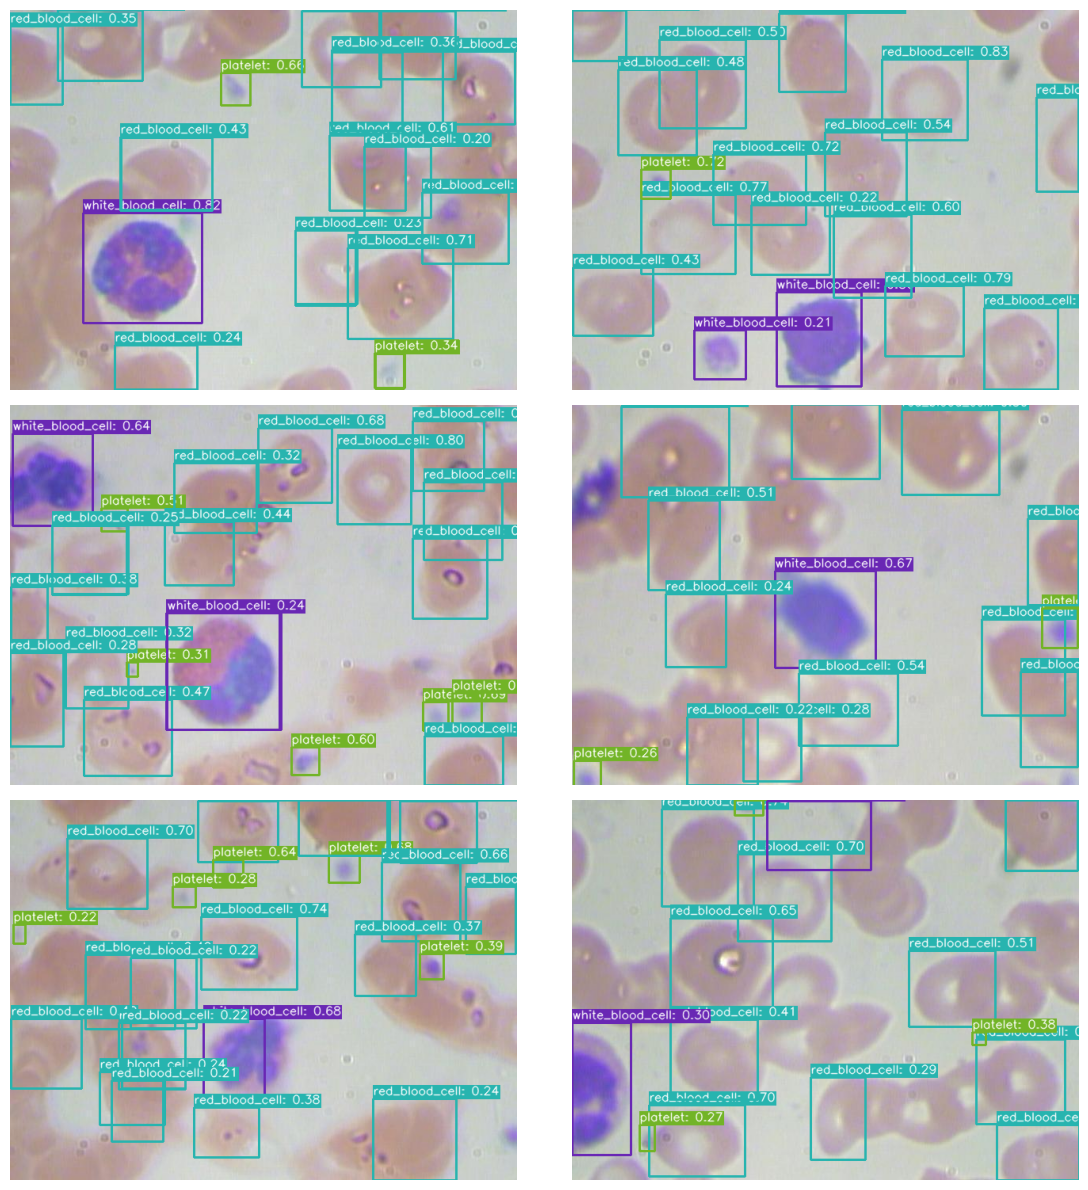

In [9]:
# Plot results in a grid
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4*n_rows))  

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result["visualization"])
    plt.axis('off')
plt.tight_layout()  
plt.show()